==================================================================================================================

 **Objective** 
 
    The data pertains to direct marketing campaigns conducted by a Portuguese banking institution. These campaigns involved phone calls, and in many cases, multiple contacts with the same client were necessary to determine if the client would subscribe ('yes') or not ('no') to a bank term deposit. This project is made to create model to predict the bank's customers decision tendency whether they would subscribe to bank's deposit product or not from the data given using supervised learning model. In this term we will using KNN, SVM, Decision Tree,Gradient Boosting, Random Forest algrithm. The data is consist of information of leads that have been contacted by the telesales and the information of the result whether they subscribe to deposit product or not and make classification over it. In general, datasets contain marketing data can be used for business goals. The result of prediction could be used to drive the marketing campaign more effective and efficient by finding more targeted customer and marketing campaign

=================================================================================================================


**IMPORTING LIBRARIES**

In [65]:
# Importing Libraries
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for Modeling
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

# Model Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Metrics
from sklearn.metrics import accuracy_score, accuracy_score

#Libraries Feature Engine
from feature_engine.outliers import Winsorizer

# Load and Dump Models
from joblib import dump
import json

**Data Legends**

*Bank's Customer Data*



    1. Age        : Age of the customer

    2. Job        : Type of client's job

    3. Marital    : Client's marital status

    4. Education  : Education level of clients

    5. Default    : Information about customer whether has credit in default or not

    6. Balance    : Average yearly balance

    7. Housing    : Information whether the customer has a housing loan or not

    8. Loan       : Has personal loan or not?

*Telesales Performance Related*

    9. Contact    : Contact communication type (categorical: 'cellular','telephone')

    10. Day       : Last contact day of the month

    11. Month     : Last contact month of the year

    12. Duration  : Last contact duration, in seconds

    13. Campaign  : Number of contacts performed during this campaign and for this client

    14. Pdays     : Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

    15. Previous  : Number of contacts performed before this campaign and for this client (numeric)

*Other Feature*

    16. Poutcome  : Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

    17. y         : Has the client subscribed a term deposit? (binary: "yes","no")



**Target Definition**

In this case a deposit is a sum of money placed into a bank account or financial institution for safekeeping or to earn interest. So in this case we want to predict customer that would subscribe to its particullar product

**DATA LOADING**

In [2]:
df= pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data = df.copy()

We are copying data frame from the original data so we can modify the data without make any changes in original data

In [4]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


    The data is consist of 17 columns and 45.211 rows. It has 16 feature and y as target.

    Numeric Features: age, balance, day, duration, campaign, pdays, previous.

    Categorical Features: job, marital, education, default, housing, loan, contact, month, poutcome.

**EDA (EXPLORATORY DATA ANALYSIS)**

C:\Users\ACER\AppData\Local\Temp\ipykernel_17484\2593425226.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")


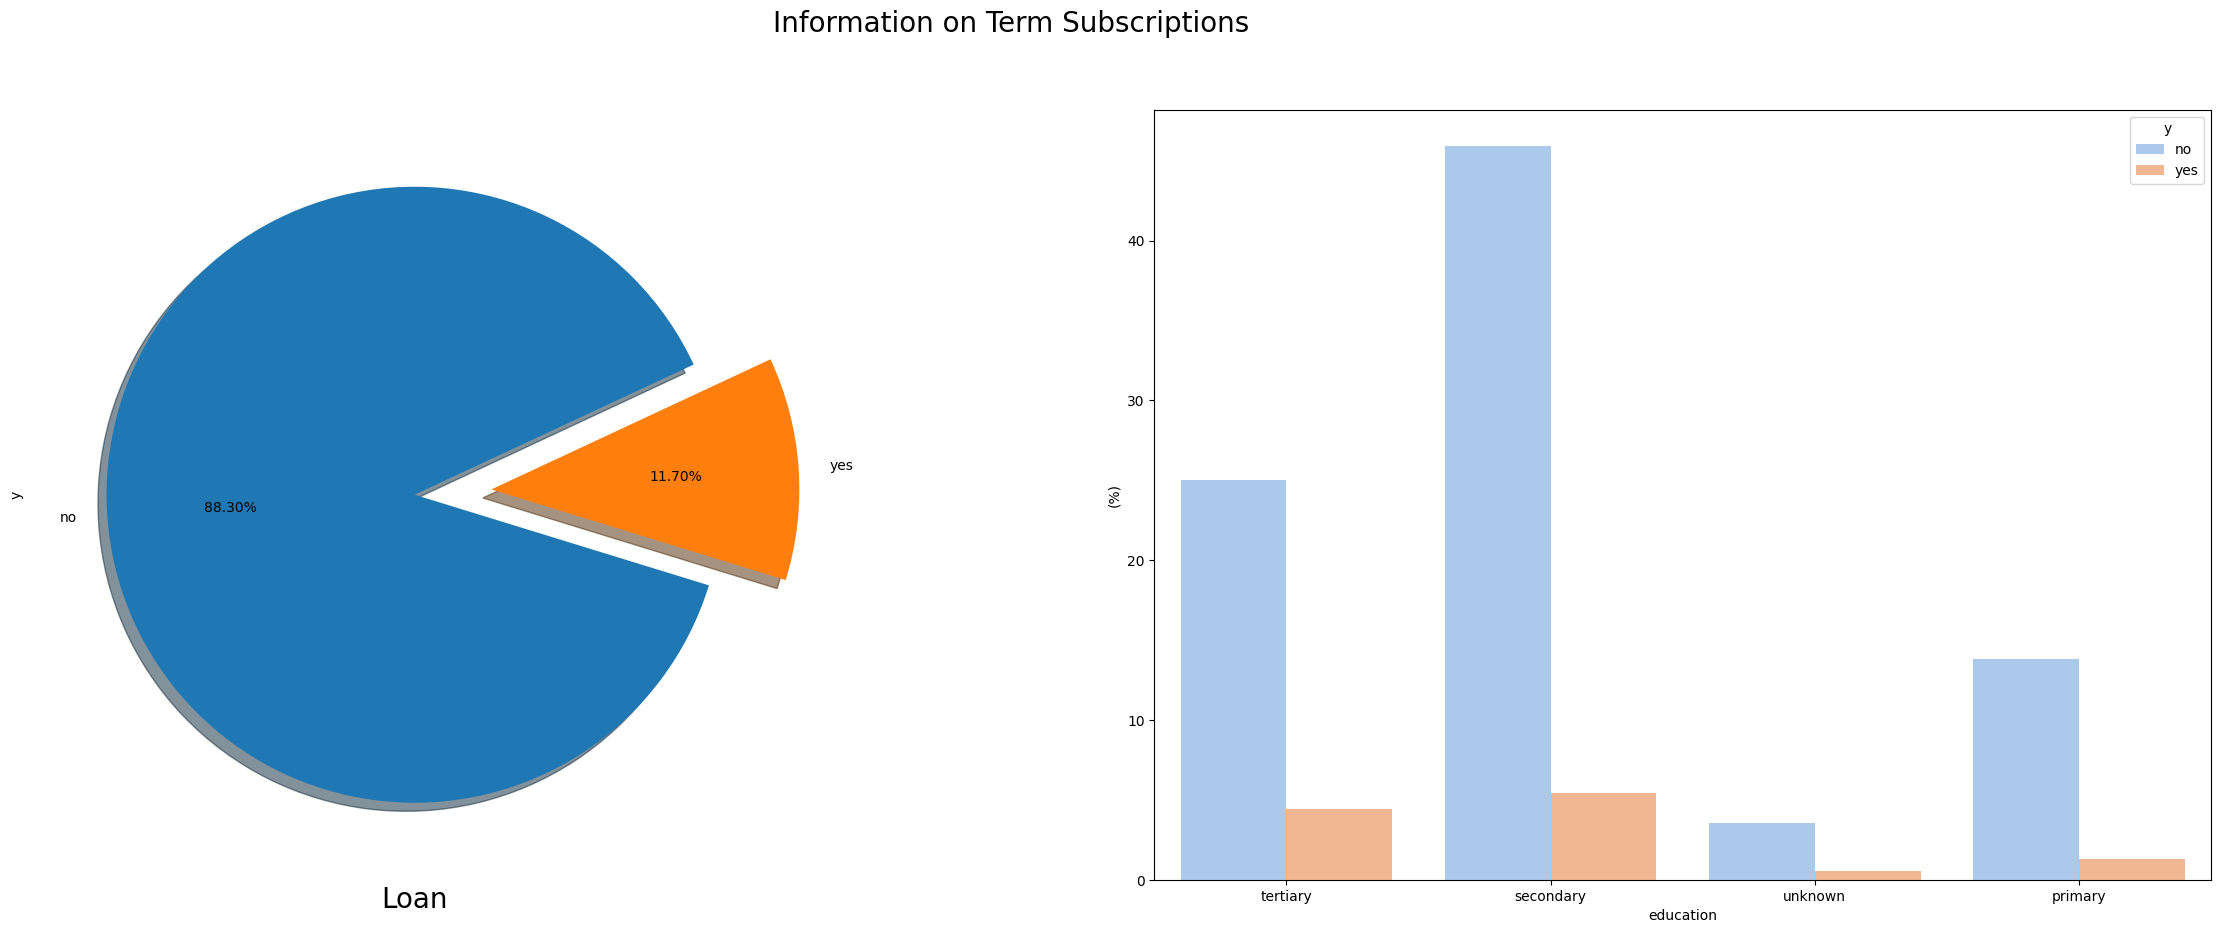

In [7]:

f, ax = plt.subplots(1, 2, figsize=(30, 10))

labels = "Didn't Make Subscriptions", "Made Subscriptions"

plt.suptitle('Information on Term Subscriptions', fontsize=20)

data["y"].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, startangle=25)
ax[0].set_xlabel('Loan', fontsize=20)

# Using a predefined palette pattern for the bar plot
sns.set_palette("pastel")

sns.barplot(x="education", y="balance", hue="y", data=data, estimator=lambda x: len(x) / len(data) * 100, ax=ax[1])
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")

plt.show()


The absence of overlap between 'yes' and 'no' responses in the provided data suggests a binary and decisive nature of the responses, indicating a clear-cut distinction between positive and negative outcomes. From a business perspective, this insight underscores the importance of understanding and targeting specific audience segments effectively. By recognizing this binary behavior, businesses can tailor their marketing strategies, products, or services to cater to the distinct preferences or needs of different customer segments. Additionally, it highlights the significance of clear and unambiguous communication or calls to action in marketing campaigns, ensuring that messages resonate clearly with the intended audience and elicit the desired responses. Furthermore, businesses can leverage this insight to refine their customer segmentation strategies, identify high-value customer segments, and personalize offerings to meet their unique preferences, ultimately driving customer engagement, loyalty, and business growth.

<Figure size 1200x800 with 0 Axes>

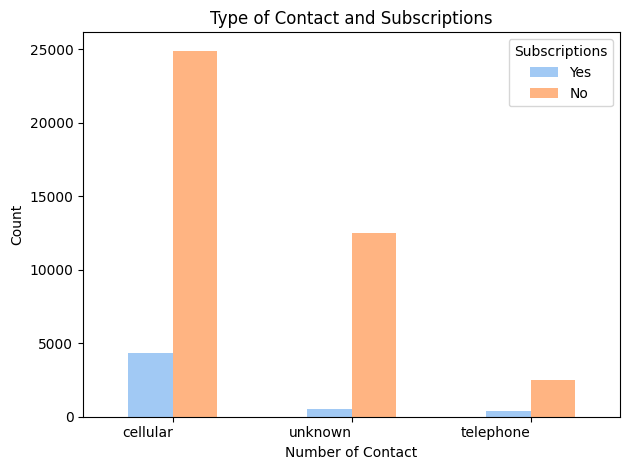

In [8]:
#type of contact and deposit
dt = pd.DataFrame()

dt['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
dt['no'] = data[data['y'] == 'no']['contact'].value_counts()
# Create the bar plot
plt.figure(figsize=(12, 8))
dt.plot.bar()

# Add labels and title
plt.title('Type of Contact and Subscriptions')
plt.xlabel('Number of Contact')
plt.ylabel('Count')
plt.legend(title='Subscriptions', loc='upper right', labels=['Yes', 'No'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

The insight from the provided data suggests that the majority of contacts are made through cellular communication, with significantly higher counts compared to other methods such as unknown and telephone. This highlights the prevalence of mobile communication channels in the dataset. Additionally, it would be beneficial to analyze the response rates associated with each contact method to understand which method yields the most positive responses. This insight can guide marketing or communication strategies by emphasizing more effective channels to increase the likelihood of positive outcomes.

<Figure size 1200x800 with 0 Axes>

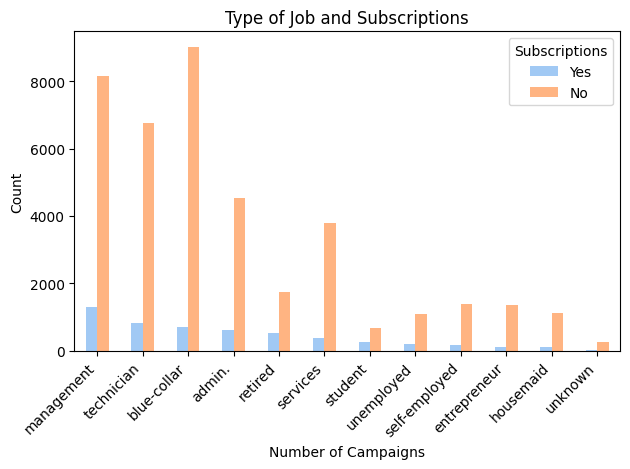

In [9]:
#type of contact and deposit
dt = pd.DataFrame()

dt['yes'] = data[data['y'] == 'yes']['job'].value_counts()
dt['no'] = data[data['y'] == 'no']['job'].value_counts()
# Create the bar plot
plt.figure(figsize=(12, 8))
dt.plot.bar()

# Add labels and title
plt.title('Type of Job and Subscriptions')
plt.xlabel('Number of Campaigns')
plt.ylabel('Count')
plt.legend(title='Subscriptions', loc='upper right', labels=['Yes', 'No'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

The provided data presents information on job categories and corresponding responses categorized as either positive (yes) or negative (no). Insight from this data reveals variations in response counts across different job categories. Specifically, the management and technician categories exhibit higher counts of negative responses compared to other professions such as blue-collar and administrative roles. On the other hand, job categories like retired, student, and unemployed display relatively lower counts of negative responses. This highlights potential disparities in the responses based on occupation type. Further analysis could involve examining the reasons behind these variations, identifying potential factors influencing responses within different job categories, and devising targeted strategies or interventions to address any observed disparities.

<Figure size 1200x800 with 0 Axes>

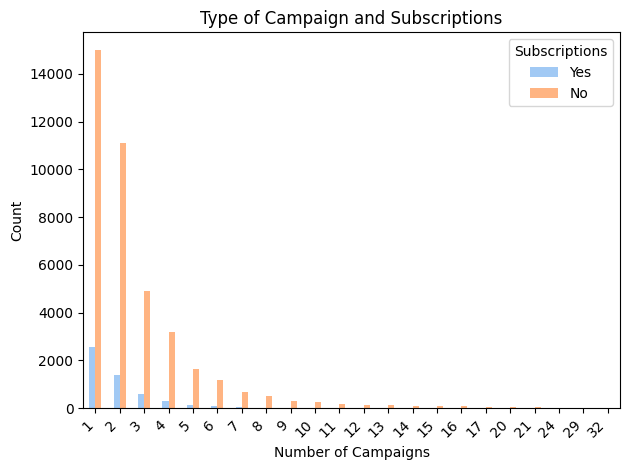

In [10]:
# Create a DataFrame for visualization
dt = pd.DataFrame()
dt['Yes'] = data[data['y'] == 'yes']['campaign'].value_counts().sort_index()
dt['No'] = data[data['y'] == 'no']['campaign'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
dt.plot.bar()

# Add labels and title
plt.title('Type of Campaign and Subscriptions')
plt.xlabel('Number of Campaigns')
plt.ylabel('Count')
plt.legend(title='Subscriptions', loc='upper right', labels=['Yes', 'No'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


The provided data represents campaign types and their corresponding response outcomes categorized as either positive (yes) or negative (no). Insights from this data reveal variations in response counts across different campaign types. Campaign type 1 has the highest count of positive responses, followed by campaign type 2, indicating their effectiveness in eliciting positive outcomes. Conversely, campaign types 16, 32, 24, and others exhibit significantly lower counts of positive responses, suggesting lower effectiveness or limited engagement with these campaign types. This insight underscores the importance of understanding the impact of different campaign strategies and optimizing resources towards more successful approaches to maximize positive response rates.

<Figure size 1200x800 with 0 Axes>

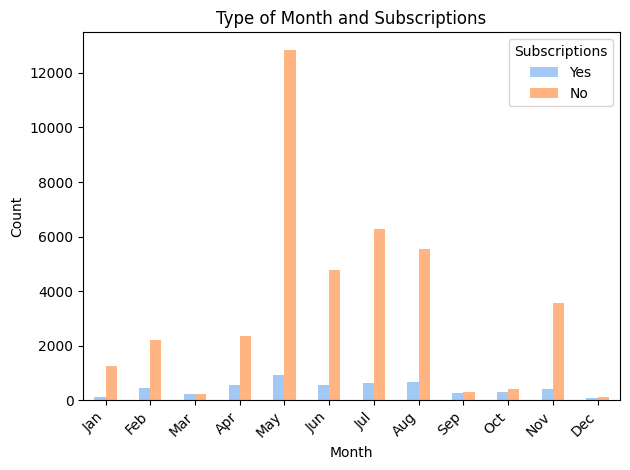

In [11]:
# Create a DataFrame for visualization
dt = pd.DataFrame()
dt['Yes'] = data[data['y'] == 'yes']['month'].value_counts().sort_index()
dt['No'] = data[data['y'] == 'no']['month'].value_counts().sort_index()

# Convert month names to uppercase and sort them
dt.index = dt.index.str.capitalize()
dt = dt.reindex(index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create the bar plot
plt.figure(figsize=(12, 8))
dt.plot.bar()

# Add labels and title
plt.title('Type of Month and Subscriptions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscriptions', loc='upper right', labels=['Yes', 'No'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

The provided data represents response outcomes categorized by months. Insights from this data indicate variations in response counts across different months. May exhibits the highest count of positive responses, followed by August and July, suggesting potential seasonal trends or campaign effectiveness during these months. Conversely, months such as December and January display relatively lower counts of positive responses, possibly due to factors like holiday seasons or lower campaign engagement. Understanding these patterns can inform strategic planning and resource allocation, allowing for more targeted and effective marketing efforts during periods of higher response rates.

**Identifying Categorical Data**

In [12]:
# Identifying Categorical Data

for i in data.columns :
    print ('column',i,'got values = ',len(data[i].unique()))

column age got values =  77
column job got values =  12
column marital got values =  3
column education got values =  4
column default got values =  2
column balance got values =  7168
column housing got values =  2
column loan got values =  2
column contact got values =  3
column day got values =  31
column month got values =  12
column duration got values =  1573
column campaign got values =  48
column pdays got values =  559
column previous got values =  41
column poutcome got values =  4
column y got values =  2


In [13]:
categorical_column = [] 
one_identical_column = []
not_categorical_column = [] 

for i in data.columns :
    if len(data[i].unique()) > 1 and len(data[i].unique()) < 15 : ## set the number after analyze the data
        print('list value in',i,' : \n', sorted(data[i].unique()),'\n')
        #Based on data analyzing for each column on i is categorical features
        categorical_column.append(i)
        #But if the value is only one identical value it wont be useful for modelling
    elif len(data[i].unique()) == 1:
         one_identical_column.append(i)
    else:
        not_categorical_column.append(i)
     
# delete y on categorical_column, 
# because y will be the target column on the next step

categorical_column.remove('y')

# check the result
print(f'column with 1 identical value :', one_identical_column)


list value in job  : 
 ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'] 

list value in marital  : 
 ['divorced', 'married', 'single'] 

list value in education  : 
 ['primary', 'secondary', 'tertiary', 'unknown'] 

list value in default  : 
 ['no', 'yes'] 

list value in housing  : 
 ['no', 'yes'] 

list value in loan  : 
 ['no', 'yes'] 

list value in contact  : 
 ['cellular', 'telephone', 'unknown'] 

list value in month  : 
 ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'] 

list value in poutcome  : 
 ['failure', 'other', 'success', 'unknown'] 

list value in y  : 
 ['no', 'yes'] 

column with 1 identical value : []


In [14]:
not_categorical_column

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

From here we got the 9 columns that are categorical, which are :

    1. Job            : it has 11 category and unknown values that will be handled in feature engineering
    2. Marital Status : It has 3 categories
    3. Education      : it has 3 feature and unknown categories that will be handled in feature engineering
    4. Default        : it has 2 categories "yes" and "no"
    5. Housing        : It has 2 categories "yes" and "no"
    6. Loan           : It has 2 categories "yes" and "no"
    7. Contact        : It has 2  categories with an unknown categories that will be handled in feature engine
    8. Month          : It has 12 categories that consists all the month of the year
    9. poutcome       : It has 2 categories with unknown values and other values and will be handled in feature engine

Additionally, we got 4 categorical features that have unknown values and needed to be handled in feature engineering and we got 7 numerical features

**Finding out outliers**

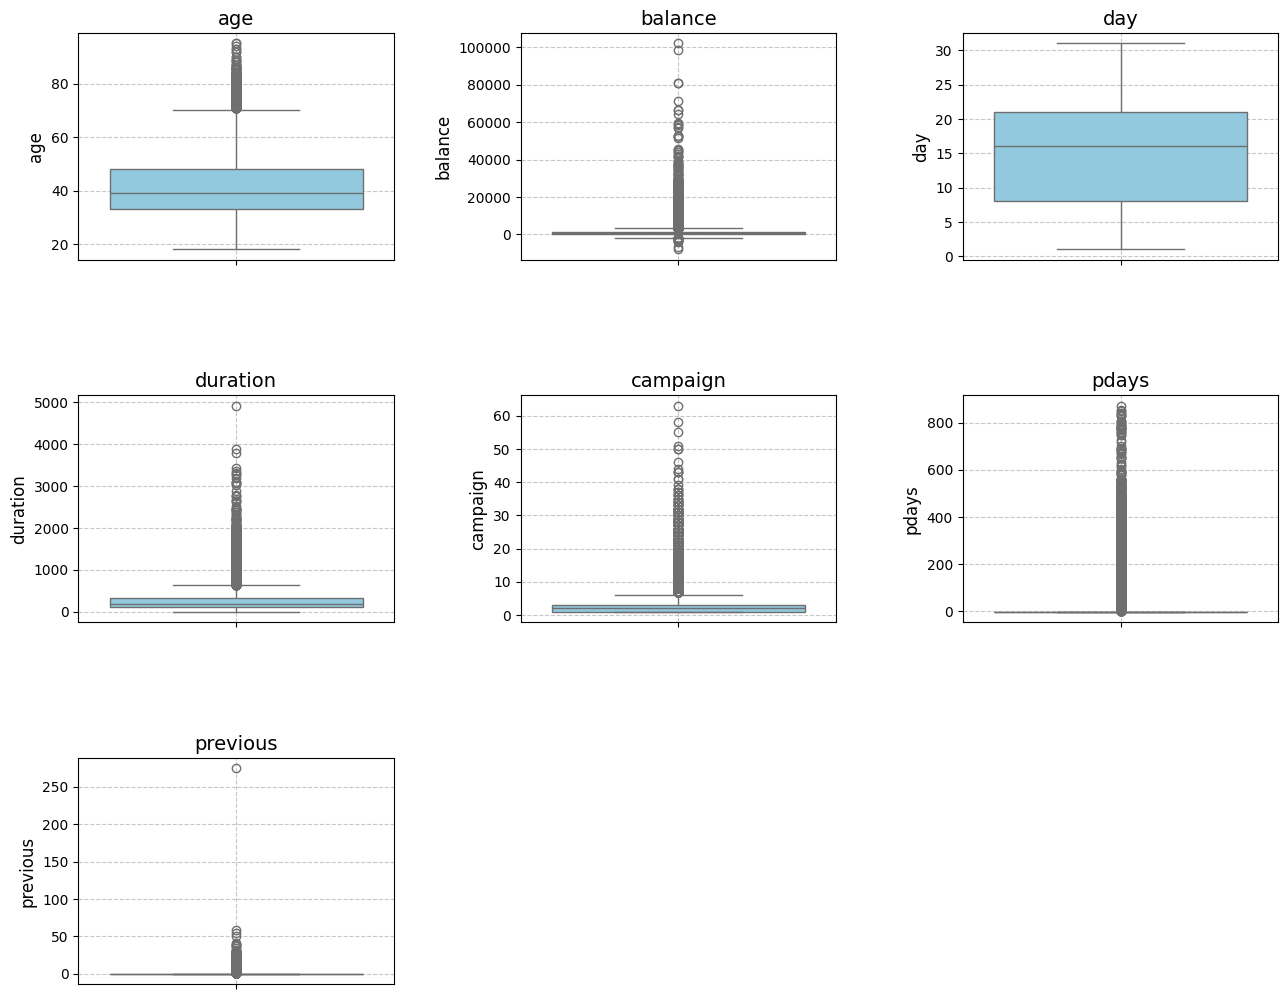

In [15]:
## Show Outliers
# Set the size of the overall figure
plt.figure(figsize=(15, 30))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# Initialize counter for subplots
subplot_count = 1

# Iterate over each column in the DataFrame
for column in data.columns:
    if column not in categorical_column and column not in one_identical_column and column != 'y':
        # Create a subplot for each column
        plt.subplot(7, 3, subplot_count)
        
        # Create a vertical boxplot for the current column with outliers shown
        sns.boxplot(data[column], color='skyblue', showfliers=True)
        
        # Add title to each subplot
        plt.title(column, fontsize=14)
        
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)

        # Rotate the x-axis labels to prevent overlap
        plt.xticks(rotation=45)
        
        # Add y-axis label
        plt.ylabel(column, fontsize=12)
        
        # Increment the subplot count
        subplot_count += 1

# Show the plot
plt.show()


**Checking low variance features**

In [16]:
"""
    Check if the variation in the given column is low using the interquartile range (IQR).

    Parameters:
    - column: Pandas Series or DataFrame column to check for variation.
    - threshold: Threshold value for low variation. Default is 0.1.

    Returns:
    - True if variation is low, False otherwise.
    """

'\n    Check if the variation in the given column is low using the interquartile range (IQR).\n\n    Parameters:\n    - column: Pandas Series or DataFrame column to check for variation.\n    - threshold: Threshold value for low variation. Default is 0.1.\n\n    Returns:\n    - True if variation is low, False otherwise.\n    '

In [17]:
def check_low_variation(column, threshold=0.1):
    
    # Calculate the Interquartile Range (IQR)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Check if the IQR is below the threshold
    if IQR < threshold:
        return True  # Low variation
    else:
        return False  # Sufficient variation

In [18]:

low_variation_column = []
# Iterate over each column in the DataFrame
for column in data.columns:
    if column not in categorical_column and column not in one_identical_column and column != 'y':
        low_variation = check_low_variation(data[column])
        print(f"Column '{column}': Low variation detected - {low_variation}")
        if low_variation == True:
            low_variation_column.append(column)

Column 'age': Low variation detected - False
Column 'balance': Low variation detected - False
Column 'day': Low variation detected - False
Column 'duration': Low variation detected - False
Column 'campaign': Low variation detected - False
Column 'pdays': Low variation detected - True
Column 'previous': Low variation detected - True


From the code above we can identify which column has low variance. Why we need to find the low vaiance feature, is regarding the next step which is outlier handling and how we handle the features

**FEATURE ENGINEERING**

**Cardinality**


The categorical features have a relatively small number of unique values, feature engineering related to cardinality can often be skipped. Low cardinality typically implies that there are fewer unique categories in the data, which may not require complex transformations or encoding techniques.The data has low cardinality so we can go to the next step

**Missing Value Handling**

In [19]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no NaN value in the columns, but there is "unknown" and "others" values in the column, next we will see how much value that got "unknown" and "others"

**Defining "Unknwon" and "Others" Values**

In [20]:
for col in data.columns:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data[col])
    unknown_percentage = (unknown_count / total_count) * 100
    print(f"Column {col}: {unknown_percentage:.2f}% unknown values")

Column age: 0.00% unknown values
Column job: 0.64% unknown values
Column marital: 0.00% unknown values
Column education: 4.11% unknown values
Column default: 0.00% unknown values
Column balance: 0.00% unknown values
Column housing: 0.00% unknown values
Column loan: 0.00% unknown values
Column contact: 28.80% unknown values
Column day: 0.00% unknown values
Column month: 0.00% unknown values
Column duration: 0.00% unknown values
Column campaign: 0.00% unknown values
Column pdays: 0.00% unknown values
Column previous: 0.00% unknown values
Column poutcome: 81.75% unknown values
Column y: 0.00% unknown values


The unknown values in "poutcome" column has significant amount of percentage. Therefore, we couldn't drop the data, so we need to do further act to handle the missing value

In [21]:
unique_values = data['contact'].unique()
print(f"Unique values in 'contact': {unique_values}")

Unique values in 'contact': ['unknown' 'cellular' 'telephone']


In [22]:
for col in data.columns:
    unknown_count = (data[col] == 'other').sum()
    total_count = len(data[col])
    unknown_percentage = (unknown_count / total_count) * 100
    print(f"Column {col}: {unknown_percentage:.2f}% other values")

Column age: 0.00% other values
Column job: 0.00% other values
Column marital: 0.00% other values
Column education: 0.00% other values
Column default: 0.00% other values
Column balance: 0.00% other values
Column housing: 0.00% other values
Column loan: 0.00% other values
Column contact: 0.00% other values
Column day: 0.00% other values
Column month: 0.00% other values
Column duration: 0.00% other values
Column campaign: 0.00% other values
Column pdays: 0.00% other values
Column previous: 0.00% other values
Column poutcome: 4.07% other values
Column y: 0.00% other values


Other values is exist in "poutcome" feature within 4.07% percentage of the whole data.

After analyzing the existence of the "unknown" and "other" values in the dataframe, we can summarize and decide: 

    1. The unknown values are existing in : 
        "job" feature with 0.64%, 
        "education" feature with 4.11%,
        "contact" feature with 28.80%,
        "poutcome" feature with 81.75% and 4.07% others value within all the dataframe 

    2. in "job" feature we can assume that people that got unknown information about their job oftenly is because they hide their occupation status, and a lot of cases where people who doesn't fill the occupation info is because they unemployed or don't have a job. so in this case, we will replace the 'unknown' info to unemployed based on previous case. 

    3. in "education" feature we got 4.11% unknown values in the data. we will impute it with most amount of value (mode) because we couldn't assume their education, in portugese, they have their own standard for their citizen education, and it shown as mode in the data, so we can meake assumption based on the country's education standard, and  will swap the "unknown" values into the (mode) values

    4. in "contact" feature we got 28.80% unknown values. In this century people has their own cellphone, and it shown that the mode of the value in contact in "celullar" so we will impute with the mode values

    5. in "poutcome" feature we got 81.75% unknown and 4.07% others values. In this case, "poutcome" is refers to the result of telesales performance to the customer in the last contact. 'unknown' and 'other' is not the same with failure, it could be needed to be followed up or still got time to reconsider or mybe not in the got term to conseidering deposit product, and still got possibilty to be contacted in the future or the next campaign, and means that still got potential to be leads for the telesales perform in the next campaign, so we will make other and unknown become one new catogry called 'potential' because the customer with those categories is still got potential to be contacted. 

In [23]:
# Replace 'Unknown' with 'unemployed'
data['job'].replace('unknown', 'unemployed', inplace=True)

# Replace 'Unknown' on education with education modulus value
data['education'].replace('unknown', data['education'].mode()[0], inplace=True)

# Replace 'Unknown' on contact with contact modulus value
data['contact'].replace('unknown', data['contact'].mode()[0], inplace=True)

# Replace 'other' and 'unknown' with 'potential'
data['poutcome'].replace(['other', 'unknown'], 'potential', inplace=True)


In [24]:
# data check
for col in data.columns:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data[col])
    unknown_percentage = (unknown_count / total_count) * 100
    print(f"Column {col}: {unknown_percentage:.2f}% unknown values")

Column age: 0.00% unknown values
Column job: 0.00% unknown values
Column marital: 0.00% unknown values
Column education: 0.00% unknown values
Column default: 0.00% unknown values
Column balance: 0.00% unknown values
Column housing: 0.00% unknown values
Column loan: 0.00% unknown values
Column contact: 0.00% unknown values
Column day: 0.00% unknown values
Column month: 0.00% unknown values
Column duration: 0.00% unknown values
Column campaign: 0.00% unknown values
Column pdays: 0.00% unknown values
Column previous: 0.00% unknown values
Column poutcome: 0.00% unknown values
Column y: 0.00% unknown values


In [25]:
## data check

for col in data.columns:
    unknown_count = (data[col] == 'other').sum()
    total_count = len(data[col])
    unknown_percentage = (unknown_count / total_count) * 100
    print(f"Column {col}: {unknown_percentage:.2f}% other values")

Column age: 0.00% other values
Column job: 0.00% other values
Column marital: 0.00% other values
Column education: 0.00% other values
Column default: 0.00% other values
Column balance: 0.00% other values
Column housing: 0.00% other values
Column loan: 0.00% other values
Column contact: 0.00% other values
Column day: 0.00% other values
Column month: 0.00% other values
Column duration: 0.00% other values
Column campaign: 0.00% other values
Column pdays: 0.00% other values
Column previous: 0.00% other values
Column poutcome: 0.00% other values
Column y: 0.00% other values


There are no longer value that consist of 'unknown' and 'other' values in this dataframe

In [26]:
##data check
data['poutcome'].value_counts()

potential    38799
failure       4901
success       1511
Name: poutcome, dtype: int64

**Data Spliting**

In [27]:
# Split between label and feature
X = data.drop(columns=['y'], axis=1)                                 # Features
y = data['y']                                                        # Label

# Split into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state=42)

We're splitting data for modelling into X and y, where 'X' is refers to he features and 'y' is refers to the target, where target means the decission that customer has made, whether they subscribe the deposit or not. We also split the data for modelling into thet test and the train in both 'X' variable and 'y' variable. So the data will be split into X_train, X_test, y_train, y_test, and the 30% of the data is split into test data and the rest 70% is the data to train the model

**Outlier Handling**

In [28]:
## save column name on list skewed or not skewed
X_TRAIN_SKEWED = []
X_TRAIN_NOT_SKEWED = []
X_TEST_SKEWED = []
X_TEST_NOT_SKEWED = []

In [29]:
# Checking skewness in X train
for column in X_train.columns:
    if column not in categorical_column and column not in one_identical_column:
        skewness = X_train[column].skew()
        if skewness >= 0.6 and skewness < 1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Positive Skewness)")
        elif skewness >= -1.0 and skewness < -0.6:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Negative Skewness)")
        elif skewness > 1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Positive Skewness)")
        elif skewness < -1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Negative Skewness)")
        else:
            X_TRAIN_NOT_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Not Skew)")

Skewness for column age: 0.6971867836177476 (Moderate Positive Skewness)
Skewness for column balance: 8.481048802332174 (Highly Positive Skewness)
Skewness for column day: 0.09386807837918064 (Not Skew)
Skewness for column duration: 3.235614480877128 (Highly Positive Skewness)
Skewness for column campaign: 5.010802404010123 (Highly Positive Skewness)
Skewness for column pdays: 2.6156038646510362 (Highly Positive Skewness)
Skewness for column previous: 46.24523497393697 (Highly Positive Skewness)


In [30]:
# Checking skewness in X test

for column in X_test.columns:
    if column not in categorical_column and column not in one_identical_column:
        skewness = X_test[column].skew()
        if skewness >= 0.6 and skewness < 1.0:
            X_TEST_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderated Positive Skewness)")
        elif skewness >= -1.0 and skewness < -0.6:
            X_TEST_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderated Negative Skewness)")
        elif skewness > 1.0:
            X_TEST_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Positive Skewness)")
        elif skewness < -1.0:
            X_TEST_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Negative Skewness)")
        else:
            X_TEST_NOT_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Not Skew)")

Skewness for column age: 0.6562150887034243 (Moderated Positive Skewness)
Skewness for column balance: 8.0470753405624 (Highly Positive Skewness)
Skewness for column day: 0.0912262691406195 (Not Skew)
Skewness for column duration: 2.906749288476449 (Highly Positive Skewness)
Skewness for column campaign: 4.631455211374877 (Highly Positive Skewness)
Skewness for column pdays: 2.6152932215640505 (Highly Positive Skewness)
Skewness for column previous: 6.445015673572537 (Highly Positive Skewness)


We are doing skewness checking to determine methode that we will be used for outlier handling. From all the numerical column, we can see that only 1 numerical feature is not skewed, and in the next step we will using winsorizer using gaussian method to handle the outlier. Supposedly, the other 6 features that are skewed will be using iqr method to handle their outlier, but "pdays" and "previous" got low variance of data, so we will using gaussian method to handle the outlier

In [31]:
# First, capping the normal distribution

X_train_capped = X_train.copy()
X_test_capped = X_test.copy() 
columnx = []

# Apply Winsorizer to non-skewed columns in X_train
for column in X_TRAIN_NOT_SKEWED:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=[column],
                            missing_values='ignore')
    
    X_train_capped[column] = winsoriser_gaussian.fit_transform(X_train[[column]])


# Apply Winsorizer to non-skewed columns in X_test
for column in X_TEST_NOT_SKEWED:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=[column],
                            missing_values='ignore')
    
    X_test_capped[column] = winsoriser_gaussian.fit_transform(X_test[[column]])


 # Apply Winsorizer to low variance columns in X_test   
for column in low_variation_column:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=[column],
                            missing_values='ignore')
    
    X_train_capped[column] = winsoriser_gaussian.fit_transform(X_train[[column]])


# Apply Winsorizer to low variance columns in X_test
for column in low_variation_column:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=[column],
                            missing_values='ignore')
    
    X_test_capped[column] = winsoriser_gaussian.fit_transform(X_test[[column]])

Outliers in both the X_train and X_test data are handled using the Gaussian method, especially for data that is not skewed. This method assumes that the data follows a Gaussian (normal) distribution and identifies outliers based on how far they deviate from the mean. Outliers are typically defined as data points that fall more than a certain number of standard deviations away from the mean. This method is effective for normally distributed data but may not perform well for skewed data, where other methods like the interquartile range may be more appropriate.

In [33]:
# Apply Winsorizer to skewed columns in X_train
for column in X_TRAIN_SKEWED:
    if column not in low_variation_column:
        winsoriser_iqr = Winsorizer(capping_method='iqr',
                                tail='both',
                                fold=1.5,
                                variables=[column])
        
        X_train_capped[column] = winsoriser_iqr.fit_transform(X_train[[column]])


# Apply Winsorizer to skewed columns in X_test
for column in X_TEST_SKEWED:
    if column not in low_variation_column:
        winsoriser_iqr = Winsorizer(capping_method='iqr',
                                tail='both',
                                fold=1.5,
                                variables=[column])
        
        X_test_capped[column] = winsoriser_iqr.fit_transform(X_test[[column]]) 

Outliers in both the X_train and X_test data are handled using the interquartile method, especially for skewed data. This method identifies outliers as data points that fall below the first quartile minus 1.5 times the interquartile range (IQR) or above the third quartile plus 1.5 times the IQR. Skewed data can distort the mean and standard deviation, making the interquartile method more robust for detecting outliers in such cases.

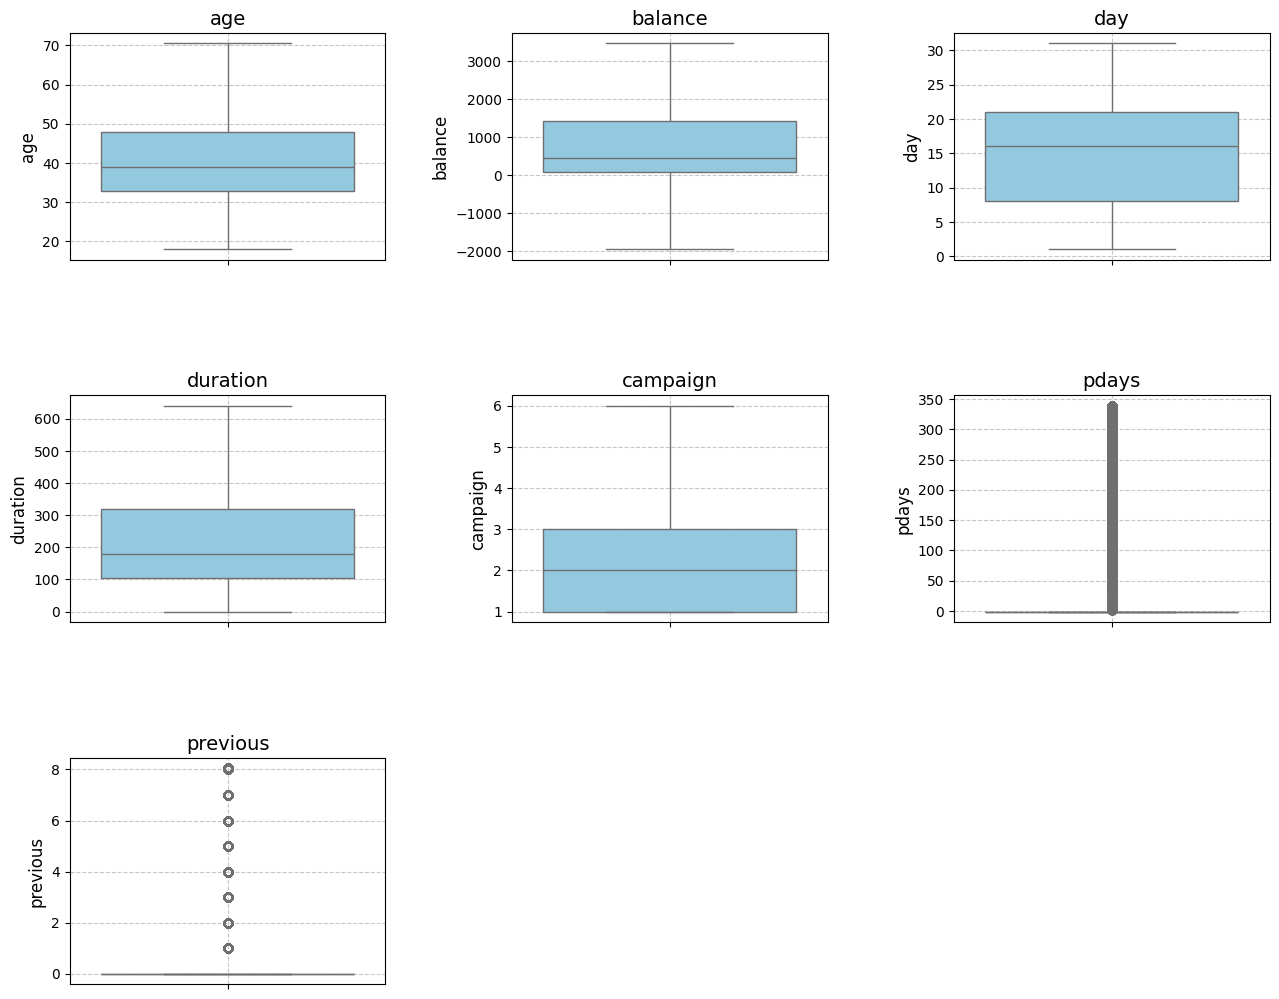

In [34]:
## Show Outliers
# Set the size of the overall figure
plt.figure(figsize=(15, 30))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# Initialize counter for subplots
subplot_count = 1

# Iterate over each column in the DataFrame
for column in X_train_capped.columns:
    if column not in categorical_column and column not in one_identical_column and column != 'y':
        # Create a subplot for each column
        plt.subplot(7, 3, subplot_count)
        
        # Create a vertical boxplot for the current column with outliers shown
        sns.boxplot(X_train_capped[column], color='skyblue', showfliers=True)
        
        # Add title to each subplot
        plt.title(column, fontsize=14)
        
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)

        # Rotate the x-axis labels to prevent overlap
        plt.xticks(rotation=45)
        
        # Add y-axis label
        plt.ylabel(column, fontsize=12)
        
        # Increment the subplot count
        subplot_count += 1

# Show the plot
plt.show()



The outliers in both the X_train and X_test datasets have been successfully handled using the interquartile range (IQR) method for skewed data. Visualization confirms that outlier removal was effective, improving the data quality and ensuring more accurate analysis. This preprocessing step enhances model performance and allows for clearer insights from the data, leading to more reliable conclusions.

In [35]:
# Assuming X_train contains your training data with both numerical and categorical features
# and y_train contains the target variable with 'yes' or 'no' labels

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

## Set Encoder and Scaler for Categorical and Numerical 
ordinal_categorical_transformer = OrdinalEncoder()
onehot_categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

In [36]:
X_train_capped

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13382,31.0,services,married,secondary,no,1.0,yes,no,cellular,9,jul,82.0,1,-1.0,0.0,potential
32641,35.0,services,married,secondary,no,195.0,yes,no,cellular,17,apr,203.0,1,-1.0,0.0,potential
3991,24.0,blue-collar,single,secondary,no,77.0,yes,no,cellular,16,may,236.0,2,-1.0,0.0,potential
8068,35.0,blue-collar,married,secondary,no,80.0,yes,yes,cellular,2,jun,579.0,2,-1.0,0.0,potential
27484,37.0,services,single,secondary,no,105.0,no,yes,cellular,21,nov,197.0,2,157.0,4.0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45.0,blue-collar,married,secondary,no,79.0,yes,no,cellular,25,jul,98.0,1,-1.0,0.0,potential
6317,30.0,blue-collar,married,secondary,no,1196.0,no,no,cellular,27,may,147.0,1,-1.0,0.0,potential
34781,27.0,management,single,tertiary,no,2559.0,yes,no,cellular,6,may,227.0,1,-1.0,0.0,potential
13679,32.0,housemaid,married,primary,no,0.0,yes,no,cellular,9,jul,90.0,1,-1.0,0.0,potential


In [37]:
ordinal_categorical_column = ['education']
onehot_categorical_column = ['job',
'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

**XGBoost (For Feature Selection)** 

In [38]:
#train XGBoost model
# Pipeline untuk transformer kolom
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_categorical_transformer, onehot_categorical_column),
        ('ordinal', ordinal_categorical_transformer, ordinal_categorical_column),
        ('scaler', numerical_transformer, ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
    ],
    remainder='passthrough'  # Biarkan kolom yang tidak di-encode tetap ada
)

# Pipeline lengkap dengan RandomForestClassifier

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('xgb', xgb.XGBClassifier(random_state=42))
])

# Melatih model
pipeline_xgb.fit(X_train_capped, y_train_encoded)

#calculate and print scores for the model for top 15 features
y_train_preds = pipeline_xgb.predict(X_train_capped)
y_test_preds = pipeline_xgb.predict(X_test_capped)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_encoded, y_train_preds),
        accuracy_score(y_test_encoded, y_test_preds)))

XGB accuracy score for train: 0.958: test: 0.903


Text(0.5, 1.0, 'Feature importances (XGB)')

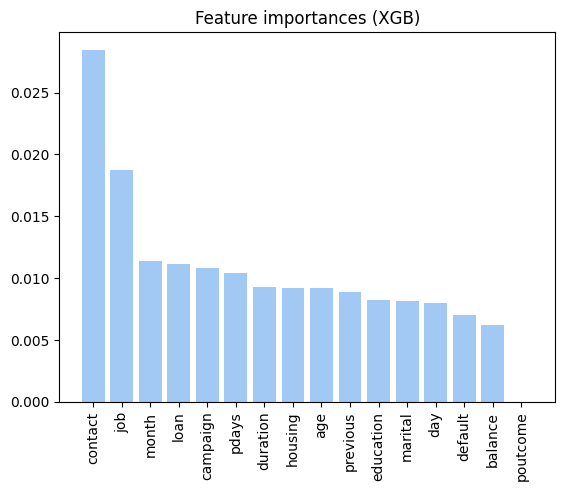

In [39]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train_capped.columns,  pipeline_xgb.named_steps['xgb'].feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')


In [40]:
# Hitung accuracy menggunakan accuracy_score
accuracy_train = accuracy_score(y_train_encoded, y_train_preds)
accuracy_test = accuracy_score(y_test_encoded, y_test_preds)
print("accuracy for Decision Tree Train:", accuracy_train)
print("accuracy for Decision Tree Test:", accuracy_test)

accuracy for Decision Tree Train: 0.9580054981514835
accuracy for Decision Tree Test: 0.9026098496018874


In [41]:
X_train_capped

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13382,31.0,services,married,secondary,no,1.0,yes,no,cellular,9,jul,82.0,1,-1.0,0.0,potential
32641,35.0,services,married,secondary,no,195.0,yes,no,cellular,17,apr,203.0,1,-1.0,0.0,potential
3991,24.0,blue-collar,single,secondary,no,77.0,yes,no,cellular,16,may,236.0,2,-1.0,0.0,potential
8068,35.0,blue-collar,married,secondary,no,80.0,yes,yes,cellular,2,jun,579.0,2,-1.0,0.0,potential
27484,37.0,services,single,secondary,no,105.0,no,yes,cellular,21,nov,197.0,2,157.0,4.0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45.0,blue-collar,married,secondary,no,79.0,yes,no,cellular,25,jul,98.0,1,-1.0,0.0,potential
6317,30.0,blue-collar,married,secondary,no,1196.0,no,no,cellular,27,may,147.0,1,-1.0,0.0,potential
34781,27.0,management,single,tertiary,no,2559.0,yes,no,cellular,6,may,227.0,1,-1.0,0.0,potential
13679,32.0,housemaid,married,primary,no,0.0,yes,no,cellular,9,jul,90.0,1,-1.0,0.0,potential


In [42]:

# Select features with importances above the threshold
selected_features = ['contact', 'job', 'campaign']
X_train_selected = X_train_capped[selected_features]
X_test_selected = X_test_capped[selected_features]
X_train_selected

,contact,job,campaign
13382,cellular,services,1
32641,cellular,services,1
3991,cellular,blue-collar,2
8068,cellular,blue-collar,2
27484,cellular,services,2
...,...,...,...
16952,cellular,blue-collar,1
6317,cellular,blue-collar,1
34781,cellular,management,1
13679,cellular,housemaid,1


**Model Definition**

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_categorical_transformer, ['contact','job']),
        ('num', numerical_transformer, ['campaign'])  # Pass column names as a list
    ])

# Create pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(random_state=42))
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                                 
    ('knn', KNeighborsClassifier())
])

dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                                 
    ('decision', DecisionTreeClassifier())
])

randomforest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                                 
    ('knn', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', GradientBoostingClassifier(random_state=42))
])

The provided code snippet demonstrates the creation of pipelines for different classification models, each designed to preprocess data and apply a specific classifier. These pipelines are essential for streamlining the machine learning workflow, ensuring that data preprocessing steps are consistent across models and simplifying the process of comparing different algorithms. The use of the `ColumnTransformer` allows for specific preprocessing strategies for different types of features, such as one-hot encoding for categorical features and numerical transformation for numerical features. Additionally, setting the `random_state=42` parameter ensures that results are reproducible, which is crucial for comparing model performance. Overall, these pipelines facilitate efficient model development and evaluation, enabling data scientists to easily experiment with various classifiers and preprocessing techniques.

In [44]:
# SVM Models

# Define the grid of parameters to search
#SVM

param_grid_svm = {
    'svm__gamma': [1, 0.1],            # Kernel coefficient
    'svm__kernel': ['linear','rbf']    # Kernel type
}

#KNN
param_grid_knn = {'knn__n_neighbors': range(1, 50)}
 
#DECISION TREE
param_grid_tree = {
    'decision__max_depth': [3, 5, 7],
    'decision__min_samples_split': [2, 5, 10]
}

# RandomForestClassifier
param_grid_RF = {
    'knn__n_estimators': [100, 200], 
    'knn__max_depth': [None, 5],
    'knn__min_samples_split': [2, 5]
}

# Define parameter grid
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.1, 0.01],
    'xgb__max_depth': [3, 5]
}

**Model Training**

In [45]:
# Create a GridSearchCV object
knn_grid = GridSearchCV(knn_pipeline, param_grid_knn, cv=5)
# Fit the grid search to the data
knn_grid.fit(X_train_capped, y_train_encoded)

# Get Best Hyperparameters
best_params_knn = knn_grid.best_params_
print("Hypermeter KNN Terbaik yang ditemukan GridSearchCV:", best_params_knn)

# Get Best Estimator for Model
best_model_knn = knn_grid.best_estimator_
best_model_knn

Hypermeter KNN Terbaik yang ditemukan GridSearchCV: {'knn__n_neighbors': 16}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['contact', 'job']),
                                                 ('num', StandardScaler(),
                                                  ['campaign'])])),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [46]:
# Perform GridSearchCV
svm_grid = GridSearchCV(svm_pipeline, param_grid_svm, cv=5)
svm_grid.fit(X_train_selected, y_train_encoded)

# Get Best Hyperparameters
best_params_svm = svm_grid.best_params_
print("Hypermeter SVM Terbaik yang ditemukan GridSearchCV:", best_params_svm)

# Get Best Estimator
best_model_svm = svm_grid.best_estimator_
best_model_svm

Hypermeter SVM Terbaik yang ditemukan GridSearchCV: {'svm__gamma': 1, 'svm__kernel': 'linear'}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['contact', 'job']),
                                                 ('num', StandardScaler(),
                                                  ['campaign'])])),
                ('svm', SVC(gamma=1, kernel='linear', random_state=42))])

In [47]:
# Perform GridSearchCV
tree_grid = GridSearchCV(dtree_pipeline, param_grid_tree, cv=5)
tree_grid.fit(X_train_capped, y_train_encoded)

# Get Best Hyperparameters
best_params_tree = tree_grid.best_params_
print("Hypermeter Decision Tree Terbaik yang ditemukan GridSearchCV:", best_params_tree)

# Get Best Estimator
best_model_tree = tree_grid.best_estimator_
best_model_tree

Hypermeter Decision Tree Terbaik yang ditemukan GridSearchCV: {'decision__max_depth': 3, 'decision__min_samples_split': 2}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['contact', 'job']),
                                                 ('num', StandardScaler(),
                                                  ['campaign'])])),
                ('decision', DecisionTreeClassifier(max_depth=3))])

In [48]:
# Perform GridSearchCV
randomf_grid = GridSearchCV(randomforest_pipeline, param_grid_RF, cv=5)
randomf_grid.fit(X_train_capped, y_train_encoded)

# Get Best Hyperparameters
best_params_rf = randomf_grid.best_params_
print("Hypermeter Random Forest Terbaik yang ditemukan GridSearchCV:", best_params_rf)

# Get Best Estimator
best_model_rf = randomf_grid.best_estimator_
best_model_rf

Hypermeter Random Forest Terbaik yang ditemukan GridSearchCV: {'knn__max_depth': 5, 'knn__min_samples_split': 2, 'knn__n_estimators': 100}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['contact', 'job']),
                                                 ('num', StandardScaler(),
                                                  ['campaign'])])),
                ('knn', RandomForestClassifier(max_depth=5, random_state=42))])

In [49]:
# Perform GridSearchCV
xboost_grid = GridSearchCV(randomforest_pipeline, param_grid_RF, cv=5)
xboost_grid.fit(X_train_selected, y_train_encoded)

# Get Best Hyperparameters
best_params_xboost = xboost_grid.best_params_
print("Hypermeter SVM Terbaik yang ditemukan GridSearchCV:", best_params_xboost)

# Get Best Estimator
best_model_xboost = xboost_grid.best_estimator_
best_model_xboost

Hypermeter SVM Terbaik yang ditemukan GridSearchCV: {'knn__max_depth': 5, 'knn__min_samples_split': 2, 'knn__n_estimators': 100}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['contact', 'job']),
                                                 ('num', StandardScaler(),
                                                  ['campaign'])])),
                ('knn', RandomForestClassifier(max_depth=5, random_state=42))])

Grid search is a hyperparameter tuning technique that exhaustively searches through a specified parameter grid to determine the best parameters for a given model. In the context of this models, the grid search likely helped find the optimal hyperparameters for each model, such as the number of trees for Random Forest, the maximum depth for Decision Tree, the C parameter for SVM, and the number of neighbors for KNN. By performing grid search, We were able to fine-tune these models to achieve the best possible performance. This process is essential for optimizing model performance and ensuring that our models are well-suited for the specific dataset and problem at hand.

**Model Evaluation**

**cross-validation**

In [73]:
# Perform cross-validation
cv_scores_knn = cross_val_score(best_model_knn, X_train_capped, y_train_encoded, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores Train for KNN:", cv_scores_knn)
print("Mean Cross-validation Score Train for KNN:", cv_scores_knn.mean())

Cross-validation Scores Train for KNN: [0.87941985 0.88302209 0.88302209]
Mean Cross-validation Score Train for KNN: 0.8818213416753563


In [72]:
# Perform cross-validation
cv_scores_svm = cross_val_score(best_model_svm, X_train_capped, y_train_encoded, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Score for SVM:", cv_scores_svm)
print("Mean Cross-validation Score for SVM", cv_scores_svm.mean())

Cross-validation Score for SVM: [0.88302209 0.88302209 0.88302209]
Mean Cross-validation Score for SVM 0.8830220874016494


In [71]:
# Perform cross-validation
cv_scores_tree_train = cross_val_score(best_model_tree, X_train_capped, y_train_encoded, cv=3, scoring='accuracy')
cv_scores_tree_test = cross_val_score(best_model_tree, X_test_capped, y_test_encoded, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Score for Forest Tree Train:", cv_scores_tree_train.mean())
print("Mean Cross-validation Score for Forest Tree Test:", cv_scores_tree_test.mean())

Cross-validation Score for Forest Tree Train: 0.8830220874016494
Mean Cross-validation Score for Forest Tree Test: 0.8829991140334409


In [69]:
# Perform cross-validation
cv_scores_rf = cross_val_score(best_model_rf, X_train_capped, y_train_encoded, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores for random forest:", cv_scores_rf)
print("Mean Cross-validation Score for random forest:", cv_scores_rf.mean())

Cross-validation Scores for random forest: [0.88302209 0.88302209 0.88302209]
Mean Cross-validation Score for random forest: 0.8830220874016494


In [68]:
# Perform cross-validation
cv_scores_xg = cross_val_score(best_model_xboost, X_train_capped, y_train_encoded, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores for gradient booster:", cv_scores_rf)
print("Mean Cross-validation Score for gradient booster:", cv_scores_rf.mean())

Cross-validation Scores for gradient booster: [0.88302209 0.88302209 0.88302209]
Mean Cross-validation Score for gradient booster: 0.8830220874016494


The cross-validation scores and mean scores for the Gradient Boosting Classifier, Random Forest, Decision Tree, SVM, and KNN models are all very close, around 0.883. This suggests that these models perform consistently well across different subsets of the data, indicating stability and reliability in their performance. The high mean cross-validation scores indicate that the models are generalizing well to unseen data, which is a positive sign of their effectiveness. However, it's important to note that while accuracy is a useful metric, it may not be the only metric to consider, especially in cases of imbalanced datasets or when other metrics like precision, recall, or F1 score are more relevant for the specific problem domain.

In [55]:
# # Predict
best_model_svm.fit(X_train_capped, y_train_encoded)
best_model_knn.fit(X_train_capped, y_train_encoded)
best_model_rf.fit(X_train_capped, y_train_encoded)
best_model_tree.fit(X_train_capped, y_train_encoded)
best_model_xboost.fit(X_train_capped, y_train_encoded)

#Assign Predicted Value to y_pred
y_pred_train_svm = best_model_svm.predict(X_train_capped)
y_pred_test_svm = best_model_svm.predict(X_test_capped)

y_pred_train_knn = best_model_knn.predict(X_train_capped)
y_pred_test_knn = best_model_knn.predict(X_test_capped)

y_pred_train_rf = best_model_rf.predict(X_train_capped)
y_pred_test_rf = best_model_rf.predict(X_test_capped)

y_pred_train_tree = best_model_tree.predict(X_train_capped)
y_pred_test_tree = best_model_tree.predict(X_test_capped)

y_pred_train_xboost = best_model_xboost.predict(X_train_capped)
y_pred_test_xboost = best_model_xboost.predict(X_test_capped)

In [56]:
# Hitung accuracy menggunakan accuracy_score
accuracy_svm_train = accuracy_score(y_train_encoded, y_pred_train_svm)
accuracy_svm_test = accuracy_score(y_test_encoded, y_pred_test_svm)
print("accuracy for SVM Train:", accuracy_svm_train)
print("accuracy for SVM Test:", accuracy_svm_test)

accuracy for SVM Train: 0.8830220874016494
accuracy for SVM Test: 0.8829991153052197


In [57]:
# Hitung accuracy menggunakan accuracy_score
accuracy_knn_train = accuracy_score(y_train_encoded, y_pred_train_knn)
accuracy_knn_test = accuracy_score(y_test_encoded, y_pred_test_knn)
print("accuracy for KNN Train:", accuracy_knn_train)
print("accuracy for KNN Test:", accuracy_knn_test)

accuracy for KNN Train: 0.8830220874016494
accuracy for KNN Test: 0.8829991153052197


In [58]:
# Hitung accuracy menggunakan accuracy_score
accuracy_rf_train = accuracy_score(y_train_encoded, y_pred_train_rf)
accuracy_rf_test = accuracy_score(y_test_encoded, y_pred_test_rf)
print("accuracy for Random Forest Train:", accuracy_rf_train)
print("accuracy for Random Forest Test:", accuracy_rf_test)

accuracy for Random Forest Train: 0.8830220874016494
accuracy for Random Forest Test: 0.8829991153052197


In [59]:
# Hitung accuracy menggunakan accuracy_score
accuracy_dt_train = accuracy_score(y_train_encoded, y_pred_train_tree)
accuracy_dt_test = accuracy_score(y_test_encoded, y_pred_test_tree)
print("accuracy for Decision Tree Train:", accuracy_dt_train)
print("accuracy for Decision Tree Test:", accuracy_dt_test)

accuracy for Decision Tree Train: 0.8830220874016494
accuracy for Decision Tree Test: 0.8829991153052197


In [67]:
# Hitung accuracy menggunakan accuracy_score
accuracy_xg_train = accuracy_score(y_train_encoded, y_pred_train_xboost)
accuracy_xg_test = accuracy_score(y_test_encoded, y_pred_test_xboost)
print("accuracy for GradientBoostingClassifier Train:", accuracy_xg_train)
print("accuracy for GradientBoostingClassifier Test:", accuracy_xg_test)

accuracy for GradientBoostingClassifier Train: 0.8830220874016494
accuracy for GradientBoostingClassifier Test: 0.8829991153052197


The accuracies for SVM, KNN, GradientBoostingClassifier, Decision Tree, and Random Forest models on both the training and test sets are identical, with a score of approximately 0.883 for both sets. This indicates that all models perform equally well on the given dataset, showing consistency in their predictive power. However, it's important to note that accuracy alone may not be the only metric to consider when evaluating model performance, as it may not capture the full picture of a model's capabilities, especially in cases of imbalanced datasets or when certain classes are more critical to predict accurately than others.

**Model Saving**

In [66]:
save_selected_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
# Save the pipeline to a .pkl file
dump(best_model_xboost, 'deployment/model_pipeline.pkl')

# Save the selected features to a txt file 
with open('deployment/selected_features.txt', 'w') as file_1:
  json.dump(save_selected_features, file_1)

The GradientBoostingClassifier is a powerful ensemble learning method that builds a strong predictive model by combining the predictions of multiple individual models, typically decision trees. It works by sequentially fitting new models to the residual errors of the previous models, with each new model correcting the errors made by the previous ones. This iterative process allows the model to learn complex relationships in the data and achieve high predictive accuracy.

One key insight about GradientBoostingClassifier is its ability to handle both regression and classification tasks effectively. It can handle a variety of data types, including numerical and categorical features, making it versatile for different types of datasets. Additionally, GradientBoostingClassifier is less prone to overfitting compared to other ensemble methods, such as Random Forest, especially when the number of trees (n_estimators) is carefully tuned.

Overall, GradientBoostingClassifier is a powerful and flexible algorithm that can deliver high predictive performance across a wide range of applications, making it a popular choice among data scientists and machine learning practitioners.

**Conclusion**

*Business Conclusion* : 

    1. The analysis provides valuable insights for optimizing marketing strategies and expanding customer acquisition efforts in the banking sector. By focusing marketing budgets on targeted potential customers, banks can enhance the efficiency of their campaigns and improve return on investment. Additionally, allocating resources to explore new leads beyond the existing customer base can diversify the customer portfolio and tap into new markets. This approach not only maximizes the impact of marketing budgets but also broadens the bank's customer reach and engagement. Overall, the data-driven insights can guide banks in making informed decisions to drive business growth and stay competitive in the market.

    2. The provided data represents response outcomes categorized by months. Insights from this data indicate variations in response counts across different months. May exhibits the highest count of positive responses, followed by August and July, suggesting potential seasonal trends or campaign effectiveness during these months. Conversely, months such as December and January display relatively lower counts of positive responses, possibly due to factors like holiday seasons or lower campaign engagement. Understanding these patterns can inform strategic planning and resource allocation, allowing for more targeted and effective marketing efforts during periods of higher response rates.

    3. The insight from the provided data suggests that the majority of contacts are made through cellular communication, with significantly higher counts compared to other methods such as unknown and telephone. This highlights the prevalence of mobile communication channels in the dataset. Additionally, it would be beneficial to analyze the response rates associated with each contact method to understand which method yields the most positive responses. This insight can guide marketing or communication strategies by emphasizing more effective channels to increase the likelihood of positive outcomes.

*Model Conclusion* : 
    
    In conclusion, the analysis highlights the importance of data balancing for future model improvements. As observed, the dataset exhibits an imbalance in the target variable, with a significant majority of non-default cases compared to default cases. Addressing this imbalance through techniques like oversampling or undersampling can enhance the model's performance and generalization to unseen data. Balancing the data can lead to a more accurate and robust model, enabling better predictions and decision-making in identifying potential defaulters. This step is crucial for improving the model's reliability and effectiveness in real-world applications, ultimately contributing to better risk management and customer targeting strategies in the banking sector.